![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/Question_vs_Statement.ipynb)


# [Question vs Statement Classifier](https://nlp.johnsnowlabs.com/2021/11/04/bert_sequence_classifier_question_statement_en.html)


Trained to add sentence classifying capabilities to distinguish between Question vs Statements.

This model was imported from [Hugging Face](https://huggingface.co/shahrukhx01/question-vs-statement-classifier), and trained based on [Haystack](https://github.com/deepset-ai/haystack/issues/611).


This model can be used to classify questions in comments and automatically add the appropirate label
<br>

This model can be used to predict the following news categories 
`question`, `statement`

<br>




The data Source used to train this can be found [here](https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs)

<br>

##Benchmark on Dataset 
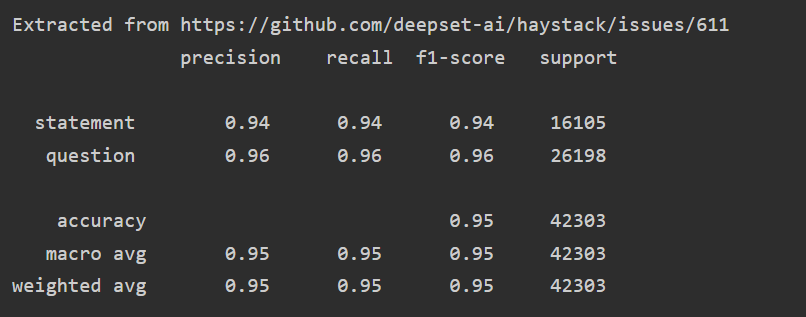

##1.Setup Java 8 and NLU

In [ ]:
!wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh -O - | bash
import nlu

--2022-05-19 23:27:38--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.4.4rc1 with  PySpark 3.0.3 and Spark NLP 3.4.3 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2022-05-19 23:27:38 (1.43 MB/s) - written to stdout [1665/1665]

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 https://developer.download.nvidia.com/compute

##2.Load the mdoel and make Sample Predictions 

In [ ]:
pipeline = nlu.load('en.classify.question_vs_statement')
pipeline.predict("What feature in your car did you not realize you had until someone else told you about it?",output_level = 'document')

bert_sequence_classifier_question_statement download started this may take some time.
Approximate size to download 40.4 MB
[OK!]


,classified_sequence,classified_sequence_confidence,document
0,question,0.9773,What feature in your car did you not realize y...


##3.Define Sample Sentences

In [ ]:
sample_sentences = [
"I love the food here!",
"Which movie genre would you like to watch?",
"Wanna go out tonight?",
"I am going to get the new game."
]

##4.Predict on Sample Sentences

In [ ]:
pipeline.predict(sample_sentences,output_level = 'document')

,classified_sequence,classified_sequence_confidence,document
0,statement,0.996214,I love the food here!
1,question,0.998511,Which movie genre would you like to watch?
2,question,0.993408,Wanna go out tonight?
3,statement,0.998788,I am going to get the new game.


##5.Take a look at the parmaters of the pipeline

In [ ]:
pipeline.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_for_sequence_classification'] has settable params:
component_list['bert_for_sequence_classification'].setActivation('softmax')  | Info: Whether to calculate logits via Softmax or Sigmoid. Default is Softmax | Currently set to : softmax
component_list['bert_for_sequence_classification'].setBatchSize(8)  | Info: Size of every batch | Currently set to : 8
component_list['bert_for_sequence_classification'].setCoalesceSentences(False)  | Info: Instead of 1 class per sentence (if inputCols is '''sentence''') output 1 class per document by averaging probabilities in all sentences. | Currently set to : False
component_list['bert_for_sequence_classification'].setMaxSentenceLength(128)  | Info: Max sentence length to process | Currently set to : 128
component_list['bert_for_sequence_classification'].setCaseSensitive(True)  | Info: whether to ignore case in tokens for embed

Looking Good! Let's test this model on a labelled dataset to see how it performs 

##6.Download Data

we are going to test the model on [this](https://www.kaggle.com/datasets/stefanondisponibile/quora-question-keyword-pairs?select=test.tsv) dataset 




In [ ]:
!wget http://ckl-it.de/wp-content/uploads/2022/05/question_vs_statement.csv

--2022-05-19 23:43:13--  http://ckl-it.de/wp-content/uploads/2022/05/question_vs_statement.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9931364 (9.5M) [text/csv]
Saving to: ‘question_vs_statement.csv’

question_vs_stateme 100%[===================>]   9.47M  9.06MB/s    in 1.0s    

2022-05-19 23:43:14 (9.06 MB/s) - ‘question_vs_statement.csv’ saved [9931364/9931364]



In [ ]:
import pandas  as pd 
df = pd.read_csv("question_vs_statement.csv")
df

,Unnamed: 0,text,y
0,0,Why are African-Americans so beautiful?,question
1,1,African Americans,statement
2,2,Why are hispanics so beautiful?,question
3,3,hispanics beautiful,statement
4,4,I want to pursue PhD in Computer Science about...,question
...,...,...,...
160988,160988,calculate tension physics,statement
160989,160989,How can I make money online quickly and easily,question
160990,160990,money,statement
160991,160991,What is make money online?,question


Let's take  a Peek at the distribution of the labels 

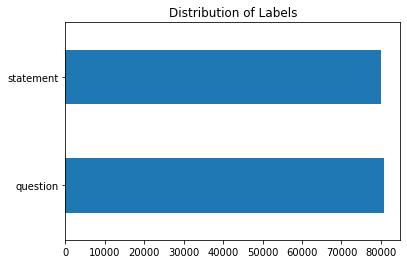

In [ ]:
df.y.value_counts().plot.barh(title='Distribution of Labels')

##7.Make Predictions with the model

In [ ]:
# The dataset is very large so we only take the first 15000 rows
df = df.iloc[:15000]

In [ ]:
predctions = pipeline.predict(df,output_level = 'document')

In [ ]:
predctions = predctions.dropna(subset = ['classified_sequence'])

In [ ]:
predctions

,Unnamed: 0,classified_sequence,classified_sequence_confidence,document,text,y
0,0,question,0.99905,Why are African-Americans so beautiful?,Why are African-Americans so beautiful?,question
1,1,statement,0.998174,African Americans,African Americans,statement
2,2,question,0.999225,Why are hispanics so beautiful?,Why are hispanics so beautiful?,question
3,3,statement,0.995106,hispanics beautiful,hispanics beautiful,statement
4,4,question,0.998553,I want to pursue PhD in Computer Science about...,I want to pursue PhD in Computer Science about...,question
...,...,...,...,...,...,...
14995,14995,statement,0.995937,review NumPy Beginner Guide,review NumPy Beginner Guide,statement
14996,14996,question,0.999357,What are some reasons why marijuana should be ...,What are some reasons why marijuana should be ...,question
14997,14997,question,0.999604,why marijuana medical purposes,why marijuana medical purposes,statement
14998,14998,question,0.999142,What is the reason why marijuana should be leg...,What is the reason why marijuana should be leg...,question


##8.Evaluate Predictions 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predctions['y'], predctions['classified_sequence']) )

              precision    recall  f1-score   support

    question       0.94      0.60      0.73      7536
   statement       0.70      0.96      0.81      7464

    accuracy                           0.78     15000
   macro avg       0.82      0.78      0.77     15000
weighted avg       0.82      0.78      0.77     15000



# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models

### NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)

### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)